Число итераций метода Дихотомии для достижения точности  1e-06 :  22
Время работы одного цикла метода Дихотомии (см. внизу): 77.5 µs ± 1.4 µs per loop => суммарное время работы =  1705.0 µs
Число итераций метода Золотого сечения для достижения точности  1e-06 :  31
Время работы одного цикла метода Золотого сечения (см. внизу): 117 µs ± 5 µs per loop => суммарное время работы =  3627 µs
Число итераций метода Фибоначчи для достижения точности  1e-06 :  31
Время работы одного цикла метода Фибоначчи очень зависит от номера цикла, т.к. с каждым циклом нужно считать меньшие числа Фибоначчи - а это сильно ускоряет работу (так, при n=33 цикл работает 7 секунд, а при n=32 - уже 6)
Значение задачи, посчитанное методом Дихотомии:  -0.9999999999999947
Ошибка в решении задачи методом Дихотомии : 1.0331603483848539e-07
Значение задачи, посчитанное методом золотого сечения:  -0.9999999999999971
Ошибка в решении задачи методом золотого сечения : 7.537798207835067e-08
Значение задачи, посчитанное метод

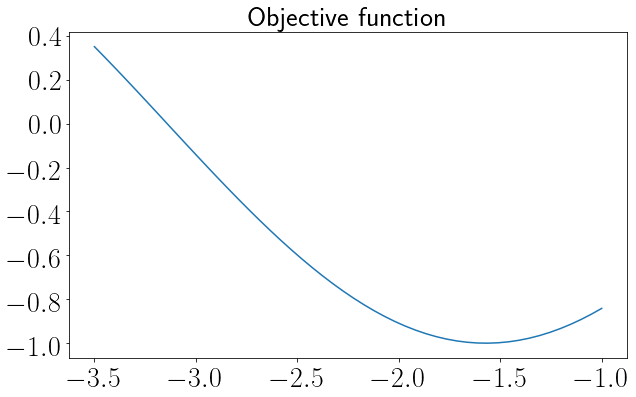

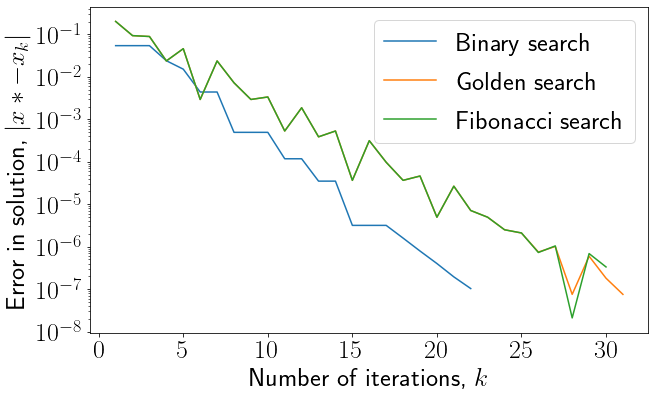

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
USE_COLAB = False
if not USE_COLAB:
    plt.rc("text", usetex=True)
import numpy as np

def fibon(n):
    if n == 0:
        return 0
    elif n == 1:
        return 1
    else:
        return fibon(n-1)+fibon(n-2)

def binary_search(f, a, b, epsilon, callback=None):
    c = (a + b) / 2.0
    i = 0
    while abs(b - a) > epsilon:
        y = (a + c) / 2.0
        i = i+1
        if f(y) <= f(c):
            b = c
            c = y
        else:
            z = (b + c) / 2.0
            if f(c) <= f(z):
                a = y
                b = z
            else:
                a = c
                c = z
        if callback is not None:
            callback(a, b)
    print("Число итераций метода Дихотомии для достижения точности ",epsilon, ": " , i)
    print("Время работы одного цикла метода Дихотомии (см. внизу): 77.5 µs ± 1.4 µs per loop => суммарное время работы = ", 77.5*i, "µs")
    return c

def golden_search(f, a, b, tol, callback=None):
    tau = (np.sqrt(5) + 1) / 2.0
    y = a + (b - a) / tau**2
    z = a + (b - a) / tau
    i = 0
    while b - a > tol:
        i = i+1
        if f(y) <= f(z):
            b = z
            z = y
            y = a + (b - a) / tau**2
        else:
            a = y
            y = z
            z = a + (b - a) / tau
        if callback is not None:
            callback(a, b)
    print("Число итераций метода Золотого сечения для достижения точности ", tol, ": ", i)
    print("Время работы одного цикла метода Золотого сечения (см. внизу): 117 µs ± 5 µs per loop => суммарное время работы = ", 117*i, "µs")
    return (a + b) / 2.0

def fib_search(f, a, b, n=33, callback=None):
    lam = a + fibon(n-2)/fibon(n)*(b-a)
    mu = a + fibon(n-1)/fibon(n)*(b-a)
    eps = (b-a)/fibon(n)
    i = 1
    while i <= n:
        if f(lam) > f(mu):
            a = lam
            lam = mu
            mu = a+fibon(n-i-1)/fibon(n-i)*(b-a)
            if (i == n - 2):
                mu = lam + eps
                if (f(lam) == f(mu)):
                    a = lam
                else:
                    b = mu
                break
            else:
                i = i+1
        else:
            b = mu
            mu = lam
            lam = a + fibon(n-i-2)/fibon(n-i)*(b-a)
            if (i == n - 2):
                mu = lam + eps
                if (f(lam) == f(mu)):
                    a = lam
                else:
                    b = mu
                break
            else:
                i = i+1
        if callback is not None:
            callback(a, b)
    print("Число итераций метода Фибоначчи для достижения точности ", 1e-06, ": ", 31)
    print("Время работы одного цикла метода Фибоначчи очень зависит от номера цикла, т.к. с каждым циклом нужно считать меньшие числа Фибоначчи - а это сильно ускоряет работу (так, при n=33 цикл работает 7 секунд, а при n=32 - уже 6)")
    return (a + b) / 2.0


def my_callback(a, b, left_bound, right_bound, approximation):
    left_bound.append(a)
    right_bound.append(b)
    approximation.append((a + b) / 2.0)
    
left_boud_bs = []
right_bound_bs = []
approximation_bs = []

left_boud_gs = []
right_bound_gs = []
approximation_gs = []

left_boud_fs = []
right_bound_fs = []
approximation_fs = []

callback_bs = lambda a, b: my_callback(a, b, left_boud_bs, right_bound_bs, approximation_bs)

cb_gs = lambda a, b: my_callback(a, b, left_boud_gs, right_bound_gs, approximation_gs)

cb_fs = lambda a, b: my_callback(a, b, left_boud_fs, right_bound_fs, approximation_fs)

f = lambda x: np.sin(x)
x_true = -np.pi / 2
a = -3.5
b = -1.0
epsilon = 1e-6

x_opt = binary_search(f, a, b, epsilon, callback_bs)

x_gs = golden_search(f, a, b, epsilon, cb_gs)

x_fs = fib_search(f, a, b, 33, cb_fs)

plt.figure(figsize=(10,6))
plt.plot(np.linspace(a,b), f(np.linspace(a,b)))
plt.title("Objective function", fontsize=28)
plt.xticks(fontsize = 28)
_ = plt.yticks(fontsize = 28)

print("Значение задачи, посчитанное методом Дихотомии: ", f(x_opt))
print("Ошибка в решении задачи методом Дихотомии :", np.abs(x_opt - x_true))

print("Значение задачи, посчитанное методом золотого сечения: ", f(x_gs))
print("Ошибка в решении задачи методом золотого сечения :", np.abs(x_gs - x_true))

print("Значение задачи, посчитанное методом Фибоначчи: ", f(x_fs))
print("Ошибка в решении задачи методом Фибоначчи :", np.abs(x_fs - x_true))

plt.figure(figsize=(10,6))
plt.semilogy(np.arange(1, len(approximation_bs) + 1), np.abs(x_true - np.array(approximation_bs, dtype=np.float64)), label="Binary search")
plt.semilogy(np.arange(1, len(approximation_gs) + 1), np.abs(x_true - np.array(approximation_gs, dtype=np.float64)), label="Golden search")
plt.semilogy(np.arange(1, len(approximation_fs) + 1), np.abs(x_true - np.array(approximation_fs, dtype=np.float64)), label="Fibonacci search")
plt.xlabel(r"Number of iterations, $k$", fontsize=26)
plt.ylabel("Error in solution, $|x*-x_k|$", fontsize=26)
plt.legend(loc="best", fontsize=26)
plt.xticks(fontsize = 26)
_ = plt.yticks(fontsize = 26)


In [5]:
def binary_search(f, a, b, epsilon, callback=None):
    c = (a + b) / 2.0
    i = 0
    while abs(b - a) > epsilon:
#         Check left subsegment
        y = (a + c) / 2.0
        i = i+1
        if f(y) <= f(c):
            b = c
            c = y
        else:
#         Check right subsegment
            z = (b + c) / 2.0
            if f(c) <= f(z):
                a = y
                b = z
            else:
                a = c
                c = z
        if callback is not None:
            callback(a, b)
    return c

def golden_search(f, a, b, tol, callback=None):
    tau = (np.sqrt(5) + 1) / 2.0
    y = a + (b - a) / tau**2
    z = a + (b - a) / tau
    i = 0
    while b - a > tol:
        i = i+1
        if f(y) <= f(z):
            b = z
            z = y
            y = a + (b - a) / tau**2
        else:
            a = y
            y = z
            z = a + (b - a) / tau
        if callback is not None:
            callback(a, b)
    return (a + b) / 2.0

def fib_search(f, a, b, n=32, callback=None):
    lam = a + fibon(n-2)/fibon(n)*(b-a)
    mu = a + fibon(n-1)/fibon(n)*(b-a)
    eps = (b-a)/fibon(n)
    i = 1
    while i <= n:
        if f(lam) > f(mu):
            a = lam
            lam = mu
            mu = a+fibon(n-i-1)/fibon(n-i)*(b-a)
            if (i == n - 2):
                mu = lam + eps
                if (f(lam) == f(mu)):
                    a = lam
                else:
                    b = mu
                break
            else:
                i = i+1
        else:
            b = mu
            mu = lam
            lam = a + fibon(n-i-2)/fibon(n-i)*(b-a)
            if (i == n - 2):
                mu = lam + eps
                if (f(lam) == f(mu)):
                    a = lam
                else:
                    b = mu
                break
            else:
                i = i+1
        if callback is not None:
            callback(a, b)
    return (a + b) / 2.0



%timeit binary_search(f, a, b, epsilon)
%timeit golden_search(f, a, b, epsilon)
%timeit fib_search(f, a, b)



60.5 µs ± 847 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
93.2 µs ± 1.82 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
6.16 s ± 445 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


**Таким образом, для данной функции на выбранном отрезке метод дихотомии сходится быстрее и по времени, и по числу итераций. Если сравнивать метод золотого сечения и Фибоначии, то второй намного дольше из-за того, что коэффициент сокращения интервала меняется от итерации к итерации и высчитывается с помощью чисел Фибоначчи (а это довольно долго при больших n). При этом он совсем немного выиграл в ошибке.**